In [ ]:
from functions import *

In [82]:
from music21 import converter, environment

In [83]:
# Set the paths to MuseScore executable
env = environment.Environment()
env['musicxmlPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'  # Path to MuseScore executable
env['musescoreDirectPNGPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'  # Path to MuseScore executable

## Process Sample Music

#### Functions

#### Usage

In [39]:
# parse the midi and keep score title
# midi_file = '..\\bach_846.mid' # Hardcoded, for multiple songs, make a function to iterate thru folder
midi_file = "..\\Music Database\\GTTM Database\\Alexander Porfir’evich Borodin\\Quartet for 2 Violins, Viola and Violoncello D major 3 Nocturne.xml"
# midi_file = ".\\Music Database\\bach_cello_suites\\Suite No. 1 in G major\\cs1-1pre.mid"
midi_parsed = converter.parse(midi_file)
score_title = midi_file[:-4] # Temporary, apparently the title is not a score element that you can extract so im using the filename

In [40]:
# Verify the paths
print("MusicXML Path:", env['musicxmlPath'])
print("MuseScore Direct PNG Path:", env['musescoreDirectPNGPath'])

MusicXML Path: C:\Program Files\MuseScore 4\bin\MuseScore4.exe
MuseScore Direct PNG Path: C:\Program Files\MuseScore 4\bin\MuseScore4.exe


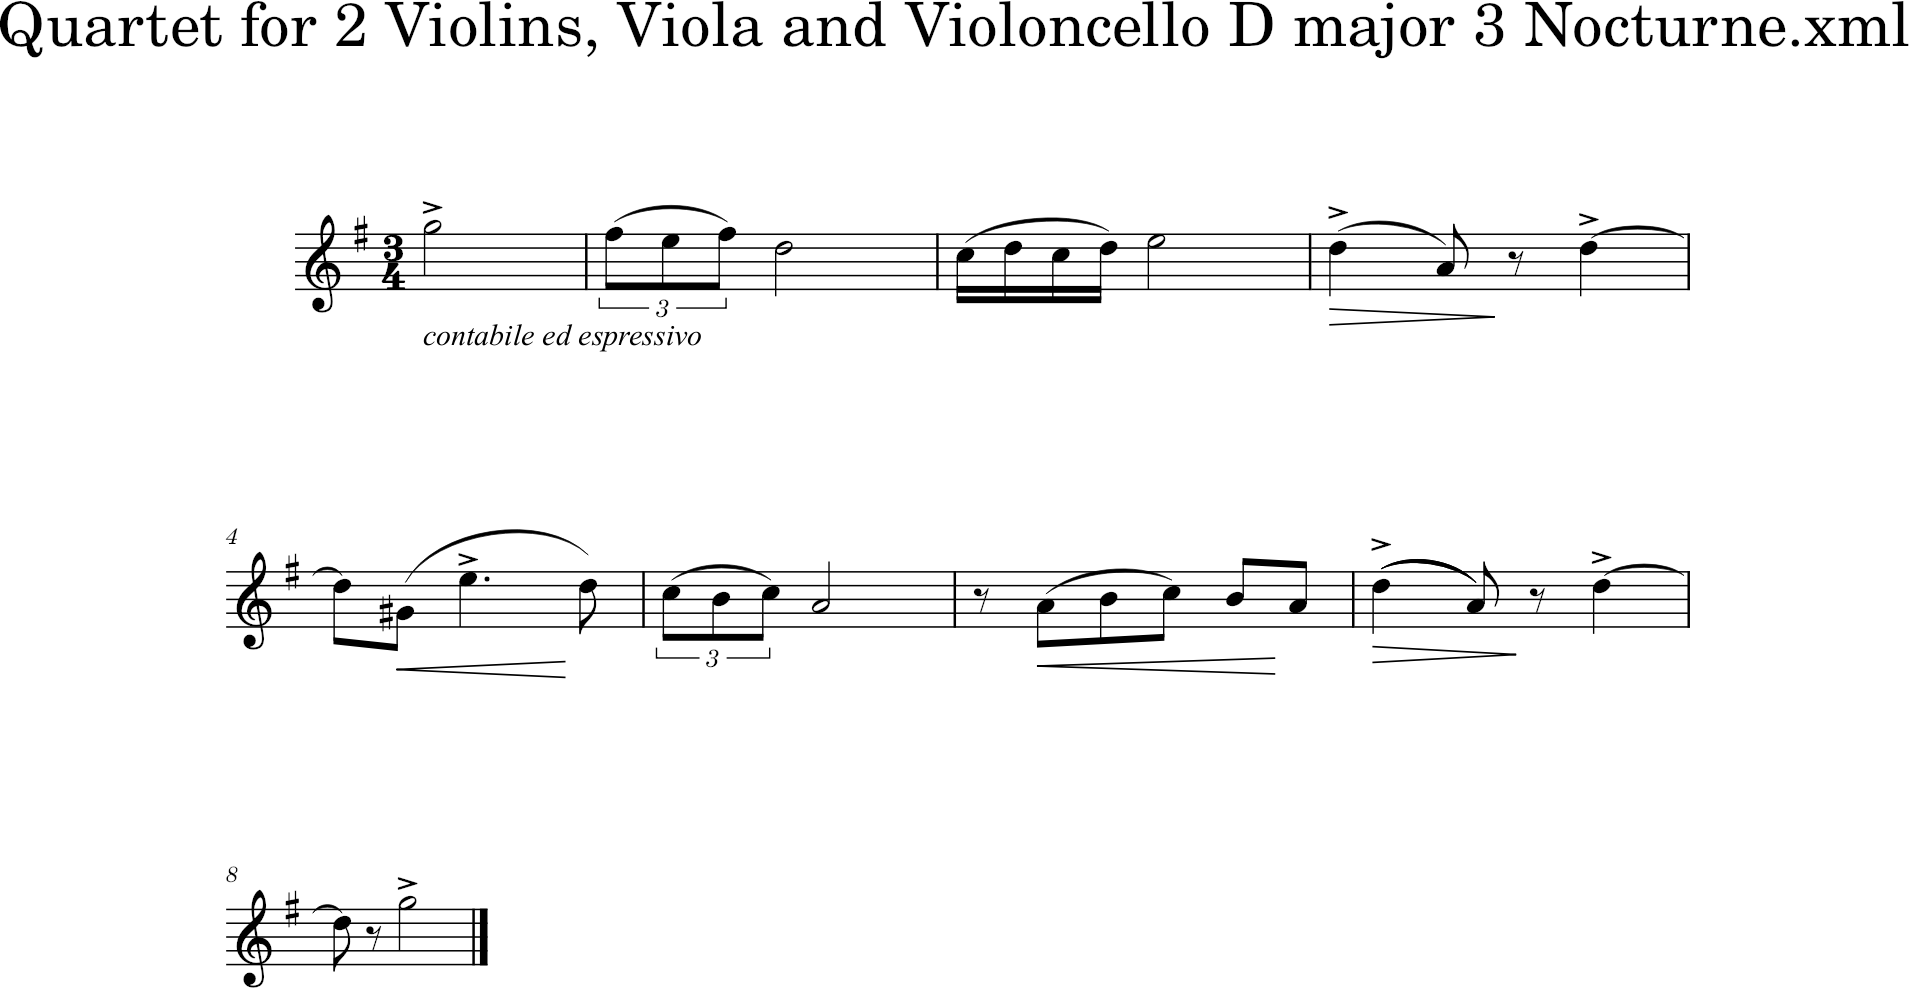

In [41]:
midi_parsed.show()

In [42]:
# convert parsed midi into a readable array of elements that forms the score
sarr = midi_to_sarr(midi_parsed) # this midi was cleaned
sarr

[<music21.expressions.TextExpression 'contabile ...'>,
 <music21.instrument.Instrument 'P1: MusicXML Part: '>,
 <music21.clef.TrebleClef>,
 <music21.tempo.MetronomeMark Quarter=96 (playback only)>,
 <music21.key.Key of G major>,
 <music21.meter.TimeSignature 3/4>,
 <music21.note.Note G>,
 <music21.spanner.Slur <music21.note.Note F#><music21.note.Note F#>>,
 <music21.spanner.Slur <music21.note.Note C><music21.note.Note D>>,
 <music21.dynamics.Diminuendo <music21.note.Note D><music21.note.Note A>>,
 <music21.spanner.Slur <music21.note.Note D><music21.note.Note A>>,
 <music21.dynamics.Crescendo <music21.note.Note G#><music21.note.Note E>>,
 <music21.spanner.Slur <music21.note.Note G#><music21.note.Note D>>,
 <music21.spanner.Slur <music21.note.Note C><music21.note.Note C>>,
 <music21.dynamics.Crescendo <music21.note.Note A><music21.note.Note B>>,
 <music21.spanner.Slur <music21.note.Note A><music21.note.Note C>>,
 <music21.dynamics.Diminuendo <music21.note.Note D><music21.note.Note A>>,
 

In [43]:
# convert score array into a note array and note matrix
nmat, narr = sarr_to_nmat_and_narr(sarr)

In [44]:
narr

[<music21.note.Note G>,
 <music21.note.Note F#>,
 <music21.note.Note E>,
 <music21.note.Note F#>,
 <music21.note.Note D>,
 <music21.note.Note C>,
 <music21.note.Note D>,
 <music21.note.Note C>,
 <music21.note.Note D>,
 <music21.note.Note E>,
 <music21.note.Note D>,
 <music21.note.Note A>,
 <music21.note.Rest eighth>,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.note.Note E>,
 <music21.note.Note D>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note A>,
 <music21.note.Rest eighth>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note D>,
 <music21.note.Note A>,
 <music21.note.Rest eighth>,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.note.Rest eighth>,
 <music21.note.Note G>]

## Implication-Realization Ruleset, Assignment and Score Visualization

#### Functions

#### Usage

In [51]:
# Usage of the above functions
try:
    narr = assign_ir_symbols(narr)
except: # temporary fix for when error occurs
    print("An erorr occured, re-importing music21")
    from music21 import *
    narr = assign_ir_symbols(narr)

# store ir symbol in nmat, pass narr data to nmat
pass_ir_symbol_narr_to_nmat(narr, nmat)

,onset_beats,duration_beats,midi_pitch,ir_symbol
0,0.0,2.0,79,P
1,2.0,1/3,78,P
2,7/3,1/3,76,P
3,8/3,1/3,78,P
4,3.0,2.0,74,P
5,5.0,0.25,72,P
6,5.25,0.25,74,ID
7,5.5,0.25,72,ID
8,5.75,0.25,74,ID
9,6.0,2.0,76,P


In [52]:
nmat

,onset_beats,duration_beats,midi_pitch,ir_symbol
0,0.0,2.0,79,P
1,2.0,1/3,78,P
2,7/3,1/3,76,P
3,8/3,1/3,78,P
4,3.0,2.0,74,P
5,5.0,0.25,72,P
6,5.25,0.25,74,ID
7,5.5,0.25,72,ID
8,5.75,0.25,74,ID
9,6.0,2.0,76,P


In [54]:
assign_ir_pattern_indices(nmat)

,onset_beats,duration_beats,midi_pitch,ir_symbol,pattern_index
0,0.0,2.0,79,P,0
1,2.0,1/3,78,P,0
2,7/3,1/3,76,P,0
3,8/3,1/3,78,P,1
4,3.0,2.0,74,P,1
5,5.0,0.25,72,P,1
6,5.25,0.25,74,ID,2
7,5.5,0.25,72,ID,2
8,5.75,0.25,74,ID,2
9,6.0,2.0,76,P,3


## Gestalt Based Segmentation (Functions)

In [56]:
# duration function
def get_duration(notematrix: pd.DataFrame, timetype='beat') -> pd.Series:
  if timetype == 'beat':
    return notematrix['duration_beats']
  else:
    ValueError(f"Invalid timetype: {timetype}. Choices are only 'beat' and 'sec'")

In [65]:
segments = segmentgestalt(nmat)

In [66]:
# TODO: Drop pattern index and hot encode da symbol
segments

(0     0
 1     0
 2     1
 3     0
 4     1
 5     0
 6     0
 7     0
 8     0
 9     1
 10    0
 11    0
 12    0
 13    0
 14    1
 15    0
 16    0
 17    0
 18    0
 19    1
 20    0
 21    1
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 32    1
 33    0
 34    0
 dtype: int64,
 0     0
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    1
 16    0
 17    0
 18    0
 19    0
 20    0
 21    1
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 32    0
 33    0
 34    0
 dtype: int64,
 [   onset_beats duration_beats  midi_pitch ir_symbol  pattern_index
  0          0.0            2.0          79         P              0
  1          2.0            1/3          78         P              0
  2          7/3            1/3          76         P              0
  3          8/3            1/3          78         P           

In [79]:
segments[2][1].drop(columns=['pattern_index'])

,onset_beats,duration_beats,midi_pitch,ir_symbol
16,12.0,1.5,76,P
17,13.5,0.5,74,P
18,14.0,1/3,72,P
19,43/3,1/3,71,IP
20,44/3,1/3,72,IP
21,15.0,2.0,69,IP


## Get Clang Boundaries and Segments

In [ ]:
# show clang boundaries
clang_boundaries = calculate_clang_boundaries(nmat)
print("Clang Boundaries:", clang_boundaries)

In [ ]:
calculate_segment_boundaries(nmat, clang_boundaries[0])

In [ ]:
# Get segments
segments = segmentgestalt(nmat)

# Store viz related properties (score title, color), labelling the segment
labeled_segments = []
assigned_color = 'red' # HARDCODED temporary since multiple scores not impremented yet
# color_list = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'pink', 'lime']
label = (score_title, assigned_color)
for segment in segments:
    labeled_segments.append((label, segment))


# output to a readable .txt file
with open("labeled_segments.txt", "w") as f:
    f.write(f"Number of segments: {len(labeled_segments)}\n\n")
    for idx, tuple in enumerate(labeled_segments):
        label, segment = tuple
        title, color = label
        f.write(f"{title} Segment {idx+1} ({color}):\n")
        f.write(f"{segment}\n")
        f.write("--------------------------------------------\n\n")

In [ ]:
segments[1]

## DTW Distance Using TSLearn

In [37]:
# segments to distance matrix
dist_mat = segments_to_distance_matrix(segments)
print(f"there are {len(dist_mat)} elements in dist mat")

AttributeError: 'list' object has no attribute 'to_numpy'

## Building the KNN Graph


In [38]:
# building KNN Graph
k = 3
distance_matrix = dist_mat
knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

G = nx.from_scipy_sparse_array(knn_graph)

# Detect if the graph is disjoint
if not nx.is_connected(G):
    print("The KNN graph is disjoint. Ensuring connectivity...")

    # Calculate the connected components
    components = list(nx.connected_components(G))

    # Connect the components
    for i in range(len(components) - 1):
        min_dist = np.inf
        closest_pair = None
        for node1 in components[i]:
            for node2 in components[i + 1]:
                dist = distance_matrix[node1, node2]
                if dist < min_dist:
                    min_dist = dist
                    closest_pair = (node1, node2)

        # Add an edge between the closest pair of nodes from different components
        G.add_edge(closest_pair[0], closest_pair[1])

# Plot the final connected graph
pos = nx.spring_layout(G, seed=42, iterations=50)
pos_dict = {i: pos[i] for i in range(len(pos))}
nx.draw(G, node_size=50, pos=pos_dict)
plt.title('Bach Prelude in C')
plt.show()

NameError: name 'dist_mat' is not defined

In [ ]:
# distance matrix to knn graph function
def distance_matrix_to_knn_graph(k: int, distance_matrix: np.array, graph_title: str,
                                 seed: int, iterations: int):
  knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

  G = nx.from_scipy_sparse_array(knn_graph)

  # Detect if the graph is disjoint
  if not nx.is_connected(G):
      print("The KNN graph is disjoint. Ensuring connectivity...")

      # Calculate the connected components
      components = list(nx.connected_components(G))

      # Connect the components
      for i in range(len(components) - 1):
          min_dist = np.inf
          closest_pair = None
          for node1 in components[i]:
              for node2 in components[i + 1]:
                  dist = distance_matrix[node1, node2]
                  if dist < min_dist:
                      min_dist = dist
                      closest_pair = (node1, node2)

          # Add an edge between the closest pair of nodes from different components
          G.add_edge(closest_pair[0], closest_pair[1])

  # Plot the final connected graph
  pos = nx.spring_layout(G, seed=seed, iterations=iterations)
  nx.draw(G, node_size=50, pos=pos)
  plt.title(graph_title + f" (K={k})")
  plt.show()

In [ ]:
# show graph
distance_matrix_to_knn_graph(3, dist_mat, "Bach Prelude in C", 42, 50)

### Currently Trying to Put The Segment Data Into The Node so we can analyze grouped segments

In [ ]:
# segments to graph
graph, distance_matrix = segments_to_graph(5, segments, labeled_segments)

## Trying to find ways to validate "Graph Identity"

besides average dtw distance Im trying to see if I can make something of a graph "silhouette score".

Basically get the communities in the graph then calculate the following:

* homogeneity: intra-cluster distance

* heterogeneity: inter-cluster distance

* "Graph Silhoette Score:" $\frac{Heterogeneity - Homogeneity} {max(Hetero, Homo)}$

Also might take a look at clustering coefficients

In [ ]:
# graph metrics function
def graph_metrics(graph: nx.classes.graph.Graph, distance_matrix: np.array,
                  seed: int):
  avg_dtw_distance = distance_matrix.mean()
  avg_clustering_coef = nx.average_clustering(graph)

  communities = nx.community.louvain_communities(graph, seed)

  silhouette_scores = []
  for cluster in communities:
    for i in cluster:
      cluster_distances = distance_matrix[i, list(cluster - {i})]
      homogeneity = np.mean(cluster_distances)
      other_cluster_distances = [np.mean(distance_matrix[i, list(other_cluster)]) for other_cluster in communities if other_cluster != cluster]
      heterogeneity = min(other_cluster_distances) if other_cluster_distances else homogeneity
      silhouette_score = (heterogeneity - homogeneity) / max(heterogeneity, homogeneity)
      silhouette_scores.append(silhouette_score)

  # Average silhouette score for all nodes
  average_silhouette_score = np.mean(silhouette_scores)

  conductance_scores = []
  for cluster in communities:
    cluster_conductance = conductance(graph, cluster)
    conductance_scores.append(cluster_conductance)

  average_conductance = np.mean(conductance_scores)

  print("Average DTW Distance:", avg_dtw_distance)
  print("Average Clustering Coefficient:", avg_clustering_coef)
  print("Average Silhouette Score", average_silhouette_score)
  print("Average Conductance:", average_conductance)

In [ ]:
# show graph metrics and segment data
graph_metrics(graph, distance_matrix, 42)
print(f"Graph Length: {len(graph)}")

for node in graph.nodes(data=True):
  node_id = node[0]
  segment_data = node[1]['segment']
  print(f"Node {node_id} segment data:")
  print(segment_data)

In [ ]:
# plot graph function
def plot_graph(graph: nx.classes.graph.Graph,
               seed: int,
               iterations: int,
               title: str,
               node_size: int):
  pos = nx.spring_layout(graph, seed=seed, iterations=iterations)
  for node in graph.nodes(data=True):
    segment_data = node[1]['segment']
    label, matrix = segment_data
    title, color = label
    print(color)
    # G.nodes[node]['color'] = color
  nx.draw(G, node_size=node_size, node_color='red' ,pos=pos)
  plt.title(title)
  plt.show()

In [ ]:
# show graph
plot_graph(graph, 3, 50, "Bach Prelud in C (K=5)", 50)

In [ ]:
for i in range(len(graph.nodes())):
  graph.nodes[i]['segment'] = graph.nodes[i]['segment'].to_json(default_handler=str)

nt = Network('1000px', '1000px', notebook=True, cdn_resources = 'remote')
nt.from_nx(graph)
nt.show('sample_graph.html')   ### Still need to figure out the labels
display(HTML('sample_graph.html'))